In [34]:
%matplotlib inline
# Boilerplate at top of file
%load_ext autoreload
%load_ext rmagic
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from ggplot import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


# Loading/Cleaning Data

In [35]:
# Format data
sf = clean.read_and_clean_sf_crim_data_set('data/train.csv')

In [40]:
sf.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Date,Hour,Time
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,23,23:53:00
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,23,23:53:00
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13,23,23:33:00
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13,23,23:30:00
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13,23,23:30:00


# Summary/Exploration of Data set


In [4]:
counted = sf.groupby('Date', as_index=False).agg({'Dates': np.size})
counted['Date'] = counted['Date'].map(lambda x: dateutil.parser.parse(x))
counted.rename(columns={'Dates': 'Volume'}, inplace=True)
counted.head()

,Date,Volume
0,2003-01-06,400
1,2003-01-07,418
2,2003-01-08,528
3,2003-01-09,417
4,2003-01-10,399


In [ ]:
print(counted.min())
print(counted['Volume'].max())
ggplot(counted, aes(x = 'Date', y = 'Volume')) + geom_line() + ggtitle('Volume of Crime per Day') + xlab("Date") + stat_smooth(color='blue')

In [26]:
counted_category = sf.groupby('Category', as_index=False).agg({'Dates': np.size})
# print counted_category
counted_category =  counted_category.sort('Dates', ascending=0)

# counted_category.()


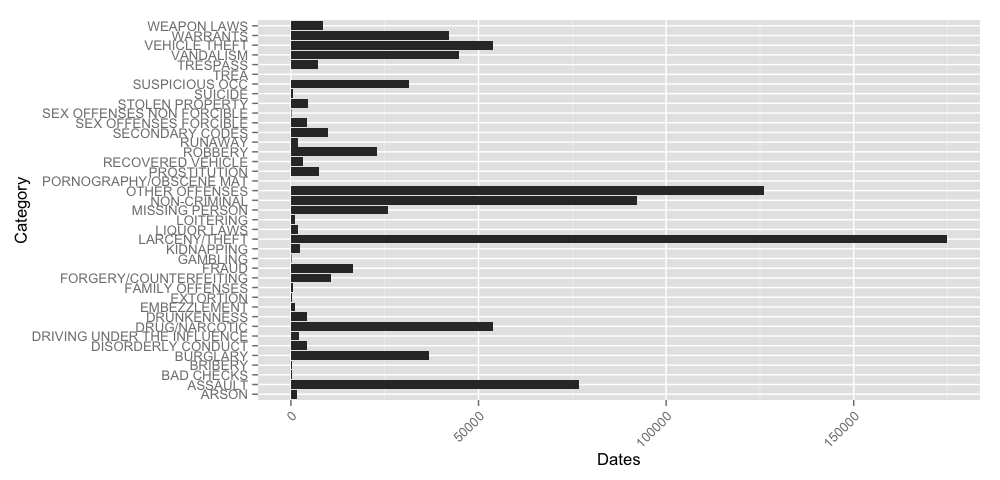

In [27]:
%%R -i counted_category -w 1000 -h 480 -u px -r 100
library(ggplot2)
ggplot(counted_category, aes(x=Category, y=Dates)) + geom_bar(stat="identity") +  coord_flip()+
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [22]:
counted_resolution = sf.groupby('Resolution', as_index=False).agg({'Dates': np.size})
# print counted_category
counted_resolution =  counted_resolution.sort('Dates', ascending=0).head(10)

# counted_category.()


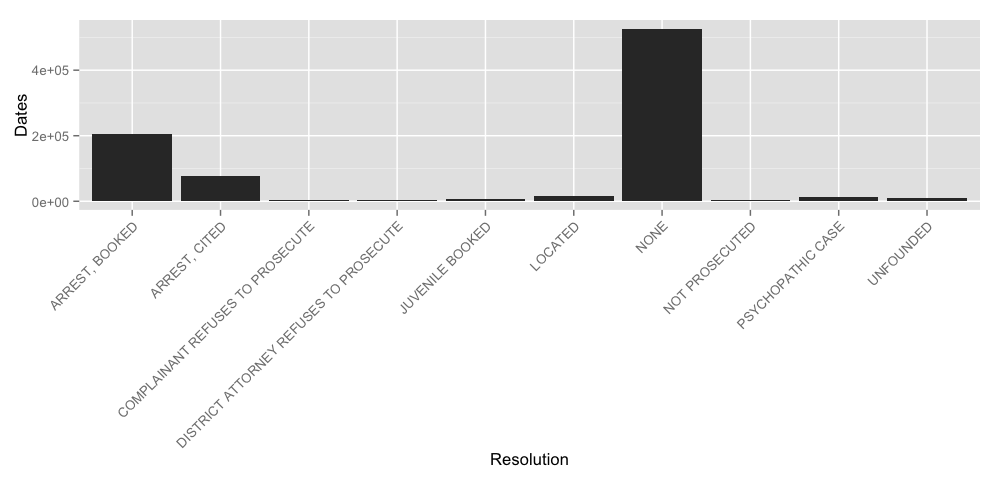

In [23]:
%%R -i counted_resolution -w 1000 -h 480 -u px -r 100
library(ggplot2)
ggplot(counted_resolution, aes(x=Resolution, y=Dates)) + geom_bar(stat="identity") +  
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Statistical Test of Time of Crime Occuring

In [39]:
sf.hist('Time')

ValueError: num must be 0 <= num <= 0, not 1

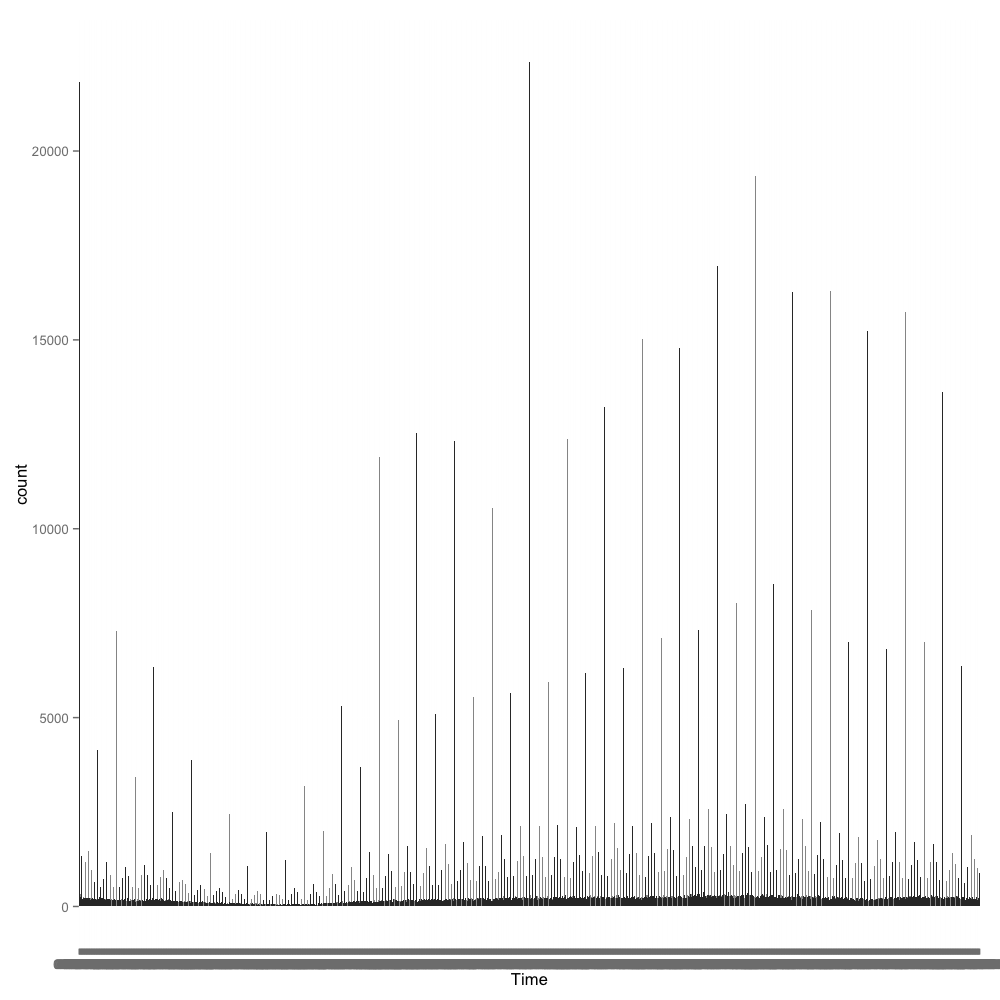

In [42]:
%%R -i sf -h 1000 -w 1000 -u px -r 100
m_df <- sf
ggplot(m_df, aes(x=Time)) + geom_bar()